


# Vamos encher o carrinho!

# Introdução

O Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido no supermercado e depois receber sua compra, semelhante ao funcionamento do Uber Eats e do iFood. O conjunto de dados que fornecemos foi modificado a partir do original. Reduzimos o tamanho dele para que seus cálculos sejam executados mais rapidamente e incluímos valores ausentes e duplicados. Também tivemos o cuidado de preservar as distribuições dos dados originais quando fizemos as alterações.

Você precisa completar três etapas. Para cada uma delas, escreva uma breve introdução descrevendo como você pretende concluir a etapa e justifique suas decisões em parágrafos explicativos a medida que você avança na solução. Escreva também uma conclusão para resumir suas conclusões e escolhas.



## Dicionário de dados

Há cinco tabelas no conjunto de dados, e você vai precisar usar todas elas para pré-processar seus dados e fazer AED. Abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número que identifica cada pedido de forma exclusiva
    - `'user_id'`: é o número de identificação exclusivo da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto exclusivo que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    - `'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número que identifica cada pedido de forma exclusiva
    -	`'product_id'`: é o número de identificação exclusivo de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    -	`'aisle'`: é o nome do corredor



-	`departments.csv`
    -	`'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Etapa 1. Visão geral dos dados

Leia os arquivos de dados (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv e /datasets/order_products.csv) com `pd.read_csv()` usando os parâmetros apropriados para fazer isso corretamente. Verifique as informações para cada DataFrame criado.


## Plano de solução

Escreva aqui seu plano para a Etapa 2. Visão geral dos dados

In [129]:
import pandas as pd

In [130]:
df_instacart = pd.read_csv('instacart_orders.csv', sep=';') 
print("Visão geral de instacart_orders.csv:")
print(df_instacart.head())
print(df_instacart.info())

Visão geral de instacart_orders.csv:
   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   o

In [131]:
df_product = pd.read_csv('products.csv', sep=';')
print("Visão geral de products.csv:")
print(df_product.head())
print(df_product.info())

Visão geral de products.csv:
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), obje

In [132]:
df_aisles = pd.read_csv('aisles.csv', sep=';')
print("Visão geral de aisles.csv:")
print(df_aisles.head())
print(df_aisles.info())

Visão geral de aisles.csv:
   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


In [133]:
df_departments = pd.read_csv('departments.csv', sep=';')
print("Visão geral de departments.csv:")
print(df_departments.head())
print(df_departments.info())

Visão geral de departments.csv:
   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes
None


In [134]:
df_product_order = pd.read_csv('order_products.csv', sep=';')
print("Visão geral de order_products.csv:")
print(df_product_order.head())
print(df_product_order.info())

Visão geral de order_products.csv:
   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None


In [135]:
df_product_order.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusões
*Podemos observar que as colunas na tabela não possuem número de valores não nulos, contém valores inteiros, float, string e booleanos. É uma lista completa com vários itens.

# Etapa 2. Preparação de dados

Faça o pré-processamento dos dados da seguinte maneira:

-	Verifique e corrija os tipos de dados (por exemplo, certifique-se de que as colunas de ID sejam números inteiros)
-	Identifique e preencha valores ausentes
-	Identifique e remova valores duplicados

Certifique-se de explicar que tipos de valores ausentes e duplicados você encontrou, como você os preencheu ou removeu, por que escolheu esses métodos e por que você acha que esses valores ausentes e duplicados estavam presentes no conjunto de dados.

## Plano de solução
*Para verificar valores duplicados: utilizados o modo duplicated().sum(). Para verificar valores ausentes: utilizamos o modo isnull().sum(), por fim, utilizamos fillna() para preencher os números ausentes, por exemplo: fillna(0, inplace=True) mais o modo isnull().sum() novamente. Para simplificação.*

## Encontre e remova valores duplicados (e descreva por que você está fazendo suas escolhas)

### DataFrame `instacart_orders`

In [136]:

df_instacart[df_instacart.duplicated()]
df_instacart['days_since_prior_order'].fillna(0, inplace=True)

C:\Users\Usuário\AppData\Local\Temp\ipykernel_7360\2860926785.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_instacart['days_since_prior_order'].fillna(0, inplace=True)


Há linhas duplicadas? Se sim, o que elas têm em comum?
*Sim, há 15  linhas duplicadas e valores ausentes, que foram substituídos por (0 e True).*

In [137]:
print((df_instacart['order_dow'] > 6).sum())
print((df_instacart['order_dow'] < 0).sum())
print((df_instacart['order_hour_of_day'] < 0).sum())
print((df_instacart['order_hour_of_day'] > 23).sum())


0
0
0
0


In [138]:
print(df_instacart['order_dow'].value_counts())
print(df_instacart['order_hour_of_day'].value_counts())

order_dow
0    84090
1    82185
2    65833
5    63488
6    62649
3    60912
4    59810
Name: count, dtype: int64
order_hour_of_day
10    40578
11    40032
15    39789
14    39631
13    39007
16    38112
12    38034
9     35896
17    31930
18    25510
8     25024
19    19547
20    14624
7     13043
21    11019
22     8512
23     5611
6      4215
0      3180
1      1763
5      1371
2      1004
3       770
4       765
Name: count, dtype: int64


In [139]:

wednesday_two_am_orders = df_instacart[(df_instacart['order_hour_of_day'] == 2) & (df_instacart['order_dow'] == 3)]
print(wednesday_two_am_orders)
# verifique todos os pedidos feitos às 2h da manhã nas quartas-feiras

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

O que esse resultado quer dizer?
*Confirma que tiveram 10 pedidos às 2 horas da manhã na quarta-feira.*

In [140]:
# Remova pedidos duplicados
df_instacart = df_instacart.drop_duplicates()
df_instacart.reset_index(drop=True)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478947,3210681,5617,5,1,14,7.0
478948,3270802,112087,2,3,13,6.0
478949,885349,82944,16,2,11,6.0
478950,216274,4391,3,3,8,8.0


In [141]:
# Verifique as linhas duplicadas mais uma vez
df_instacart.duplicated().sum()

np.int64(0)

In [142]:
# Verifique novamente apenas os IDs de pedidos duplicados
df_instacart.duplicated(subset=['order_id']).sum()

np.int64(0)

Descreva brevemente suas conclusões e o que você fez com elas.
*O comando removeu todas as linhas duplicadas do DataFrame, modificando o df original devido ao argumemnto inplace=True.*



### DataFrame `products`

In [143]:
# Verifique se há linhas completamente duplicadas

print(df_product.duplicated().sum())
print(df_product.head())

0
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  


In [144]:
# Verifique apenas IDs dos produtos duplicados
duplicate_product = df_product['product_id'].duplicated().sum()
print(duplicate_product)

0


In [145]:
# Verifique apenas nomes de produtos duplicados (converta os nomes para minúsculas para uma comparação melhor)
duplicate_product_name = df_product['product_name'].str.lower().duplicated()
print(duplicate_product_name.sum())

1361


In [146]:
# Verifique os nomes de produtos duplicados que não estão faltando
df_product.query('@duplicate_product_name and ~product_name.isna()')['product_name']

2058                                     Biotin 1000 Mcg
5455                    Green Tea With Ginseng and Honey
5558                              Cream Of Mushroom Soup
7558                           Cinnamon Rolls with Icing
9037                              American Cheese slices
                              ...                       
49689                      HIGH PERFORMANCE ENERGY DRINK
49690                      ORIGINAL PANCAKE & WAFFLE MIX
49691    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692                             SPRING WATER BODY WASH
49693                            BURRITO- STEAK & CHEESE
Name: product_name, Length: 104, dtype: object

Descreva brevemente suas conclusões e o que você fez com elas.
*Utilização do comando "duplicated" para verificar/remover duplicados, filtrando para observar a quantidade de nomes de produtos escrito em letra maiúscular, modificando para letras minúsculas e consultando valores NaN na tabela.*

### DataFrame `departments`

In [147]:
# Verifique se há linhas completamente duplicadas

print(df_departments.duplicated().sum())

0


In [148]:
# Verifique apenas se há IDs dos produtos duplicados
print(df_departments['department_id'].duplicated().sum())

0


Descreva brevemente suas conclusões e o que você fez com elas.
*Verificamos a quantidade de linhas duplicadas em "departments" e nos "IDs" e utilizamos o comodando removendo as linhas.*

### DataFrame `aisles`

In [149]:
# Verifique se há linhas completamente duplicadas
print(df_aisles.duplicated().sum())

0


In [150]:
# Verifique apenas se há IDs dos produtos duplicados
print(df_aisles['aisle_id'].duplicated().sum())

0


Descreva brevemente suas conclusões e o que você fez com elas.
*Verificamos a quantidade de linhas duplicadas em "aisles" e nos "IDs" e utilizamos o comodando removendo as linhas.*

### DataFrame `order_products`

In [151]:
# Verifique se há linhas completamente duplicadas
print(df_product_order.duplicated().sum())

0


In [152]:
print(df_product_order)

         order_id  product_id  add_to_cart_order  reordered
0         2141543       11440               17.0          0
1          567889        1560                1.0          1
2         2261212       26683                1.0          1
3          491251        8670               35.0          1
4         2571142        1940                5.0          1
...           ...         ...                ...        ...
4545002    577211       15290               12.0          1
4545003   1219554       21914                9.0          0
4545004    692640       47766                4.0          1
4545005    319435         691                8.0          1
4545006   1398151       28733                9.0          0

[4545007 rows x 4 columns]


In [153]:
# Verifique mais uma vez se há outros casos complicados de duplicados
print(df_product_order[['order_id', 'product_id']].duplicated().sum())


0


Descreva brevemente suas conclusões e o que você fez com elas.
*Não há um total de linhas duplicadas em "order_products".*

## Encontre e remova valores ausentes


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

In [154]:
# Encontre valores ausentes na coluna 'product_name'
print(df_product['product_name'].isna().sum())
print(df_instacart['days_since_prior_order'].isna().sum())
print(df_product_order['add_to_cart_order'].isna().sum())

1258
0
836


Descreva brevemente suas conclusões.
*Verificação do comando para valores ausentes das respectivas colunas.*
*Nas variáveis "df_product" e "df_product_order" há duplicacações como mostra a verificação.*

In [155]:
# Todos os nomes de produtos ausentes estão associados com o corredor de ID 100?
print(df_product[df_product['product_name'].isna()]['aisle_id'].value_counts())


aisle_id
100    1258
Name: count, dtype: int64


Descreva brevemente suas conclusões.
*Verificação da quantidade de nomes de produtos ausentes associados ao corredor ID 100.*
*Verificação de 1258 quantidades "de product_name" no ID 100.*

In [156]:
# Todos os nomes de produtos ausentes estão associados com o departamento de ID 21?
print(df_product[df_product['product_name'].isna()]['department_id'].value_counts())

department_id
21    1258
Name: count, dtype: int64


Descreva brevemente suas conclusões.
*Sim, confirmação que todos os nomes de produtos ausentes estão associados com o departamento de ID 21.*

In [157]:
# Use as tabelas department e aisle para verificar os dados do corredor com ID 100 e do departamento com ID 21.
print(df_departments[df_departments['department_id'] == 21])
print(df_aisles[df_aisles['aisle_id'] == 100])

    department_id department
20             21    missing
    aisle_id    aisle
99       100  missing


Descreva brevemente suas conclusões.
*Verificação das tabelas "departmenr" e "aisle" com os corredores ID100 e so departamento com ID21 contendo seus respectivos valores.*

In [158]:
# Preencha nomes de produtos ausentes com 'Unknown'
df_product['product_name'].fillna('Unknown', inplace=True)
print(df_product['product_name'].isna().sum())     

0


Descreva brevemente suas conclusões e o que você fez com elas.
*Verificação e substituição de "Unknow" para "inplace=True" de nomes de produtos ausentes.*

### DataFrame `orders`

In [159]:
# Encontre os valores ausentes
print(df_product_order['add_to_cart_order'].isna().sum())
print(df_product_order['order_id'].isna().sum())
print(df_product_order['product_id'].isna().sum())
print(df_product_order['reordered'].isna().sum())      

836


0
0
0


In [160]:
# Há valores ausentes para os clientes que não estão fazendo o primeiro pedido?
df_first_order = df_instacart[df_instacart.groupby('user_id')['order_number'].transform('min') < df_instacart['order_number']]
print(df_first_order.isna().sum())
print(df_instacart.isna().sum())
      

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64
order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


Descreva brevemente suas conclusões e o que você fez com elas.
*Criação de uma variavél "df_first_order" para identificar os clientes que não estão no seu primeiro pedido. Assumindo que a coluna 'order_number' indica a ordem do pedido para cada 'user_id'. Verificar se há valores ausentes no DataFrame de clientes que não estão no primeiro pedido.Para ter uma visão geral, também podemos verificar valores ausentes em toda a tabela de pedidos.*

### DataFrame `order_products`

In [161]:
# Encontre os valores ausentes
print(df_product_order['add_to_cart_order'].isna().sum())
print(df_product_order['order_id'].isna().sum())
print(df_product_order['product_id'].isna().sum())
print(df_product_order['reordered'].isna().sum())  

836
0
0
0


In [162]:
# Quais são os valores mínimo e máximo dessa coluna?
print(df_product_order['add_to_cart_order'].min())
print(df_product_order['add_to_cart_order'].max())
print(df_product_order['order_id'].min())
print(df_product_order['order_id'].max())
print(df_product_order['product_id'].min())
print(df_product_order['product_id'].max())
print(df_product_order['reordered'].min())
print(df_product_order['reordered'].max())



1.0
64.0
4
3421079
1
49694
0
1


Descreva brevemente suas conclusões.
*Calculados os valores mínimo e máximo de cada coluna.*


In [163]:
# Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'
df_pedidos_id_na = df_product_order[df_product_order['add_to_cart_order'].isna()]
df_pedidos_id_na = df_pedidos_id_na['order_id'].unique()
print(df_pedidos_id_na)


[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [164]:
df_product_order[df_product_order['order_id'].isin(df_pedidos_id_na)]

,order_id,product_id,add_to_cart_order,reordered
267,2094761,31469,57.0,1
737,2449164,5068,NaN,0
1742,2997021,4920,37.0,0
3463,871281,40063,61.0,1
3535,171934,36397,7.0,0
...,...,...,...,...
4543519,2621907,32018,28.0,1
4544672,102236,34688,49.0,0
4544708,2256933,41544,21.0,0
4544771,180546,12741,46.0,1


In [165]:
df_na = df_product_order[df_product_order['order_id'].isin(df_pedidos_id_na)]
df_na.groupby('order_id').count()

,product_id,add_to_cart_order,reordered
order_id,,,
9310,65,64,65
61355,127,64,127
102236,95,64,95
129627,69,64,69
165801,70,64,70
...,...,...,...
2999801,70,64,70
3125735,86,64,86
3308010,115,64,115


In [166]:
df_na = df_product_order.groupby('order_id')['product_id'].count()
print(df_na)
contagem_min = df_na.value_counts()
print(contagem_min.min())


order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64
1


In [167]:
# Todos os pedidos com valores ausentes contêm mais de 64 produtos?
# Agrupe os pedidos com dados ausentes por ID de pedido
# Conte o número de 'product_id' em cada pedido e verifique o valor mínimo da contagem


Descreva brevemente suas conclusões.
*Sim, há pedidos com valores ausentes com mais de 64 produtos, onde foram agrupados com os dados auasentes por ID de pedido contando e verificando o valor mínimo, que nesse caso não há valores maiores de 64.*

In [168]:
# Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer
df_product_order['add_to_cart_order'].fillna(999, inplace=True)
df_product_order['add_to_cart_order'] = df_product_order['add_to_cart_order'].astype(int)
print(df_product_order)


         order_id  product_id  add_to_cart_order  reordered
0         2141543       11440                 17          0
1          567889        1560                  1          1
2         2261212       26683                  1          1
3          491251        8670                 35          1
4         2571142        1940                  5          1
...           ...         ...                ...        ...
4545002    577211       15290                 12          1
4545003   1219554       21914                  9          0
4545004    692640       47766                  4          1
4545005    319435         691                  8          1
4545006   1398151       28733                  9          0

[4545007 rows x 4 columns]


C:\Users\Usuário\AppData\Local\Temp\ipykernel_7360\2627313918.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_product_order['add_to_cart_order'].fillna(999, inplace=True)


Descreva brevemente suas conclusões e o que você fez com elas.
*Utilizando fillna para substituir o valor 999 por True e transformando os números float em inteiro.*

## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 2. Preparação de dados
*No sistema de dados tinham algumas falhas. Foram verificados as colunas de ID, valores ausentes e valores duplicados. Foram substituidos com os códigos descritos em cada células, como, fillna, inplace, duplicated, groupby, counts, value_counts, min e int. As falhas foram arrumadas e verificadas.*

# Etapa 3. Análise de dados

Quando os dados estiverem processados ​​e prontos, execute a seguinte análise:

# [A] Fácil (é necessário concluir tudo para passar)

1.	Verifique se os valores nas colunas `'order_hour_of_day'` e `'order_dow'` na tabela `orders` fazem sentido (ou seja, os valores da coluna  `'order_hour_of_day'` variam de 0 a 23 e os da `'order_dow'` variam de 0 a 6).
2.	Crie um gráfico que mostre quantas pessoas fazem pedidos a cada hora do dia.
3.	Crie um gráfico que mostre em que dia da semana as pessoas fazem compras.
4.	Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.


### [A1] Verifique se os valores fazem sentido

In [169]:
print((df_instacart['order_dow'] > 6).sum())
print((df_instacart['order_dow'] < 0).sum())
print((df_instacart['order_hour_of_day'] < 0).sum())
print((df_instacart['order_hour_of_day'] > 23).sum())

0
0
0
0


In [170]:
import numpy as np
print(np.sort(df_instacart['order_dow'].unique()))
print(np.sort(df_instacart['order_hour_of_day'].unique()))


[0 1 2 3 4 5 6]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


Escreva suas conclusões aqui
*Verificação da tabela de cada valores das colunas e suas variações.*

### [A2] Quantas pessoas fazem pedidos a cada hora do dia?

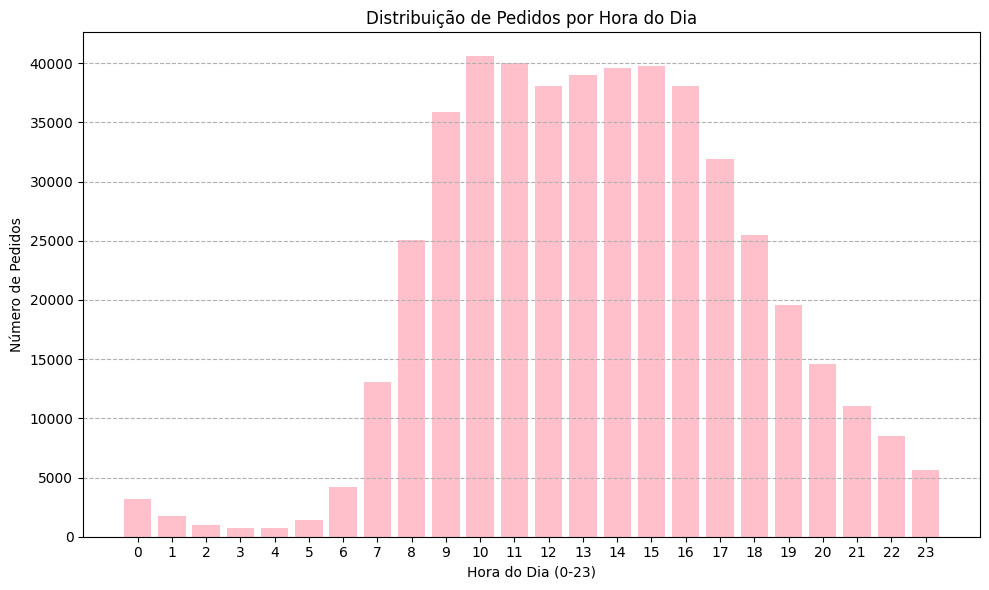

In [171]:
import matplotlib.pyplot as plt
pedidos_por_hora = df_instacart['order_hour_of_day'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(pedidos_por_hora.index, pedidos_por_hora.values, color='pink')
plt.xlabel('Hora do Dia (0-23)')
plt.ylabel('Número de Pedidos')
plt.title('Distribuição de Pedidos por Hora do Dia')
plt.xticks(range(24))  # Garante que todos os rótulos das horas sejam exibidos
plt.grid(axis='y', linestyle='--')  # Adiciona linhas de grade horizontais para melhor leitura
plt.tight_layout()
plt.show()

Escreva suas conclusões aqui
*Como demosrado no gráfico e no código, as horas do dia que os clientes fazem mais pedidos são das 9hs às 16hs (pico de movimentação de pedidos no aplicativos).*

### [A3] Em que dia da semana as pessoas compram produtos alimentícios?

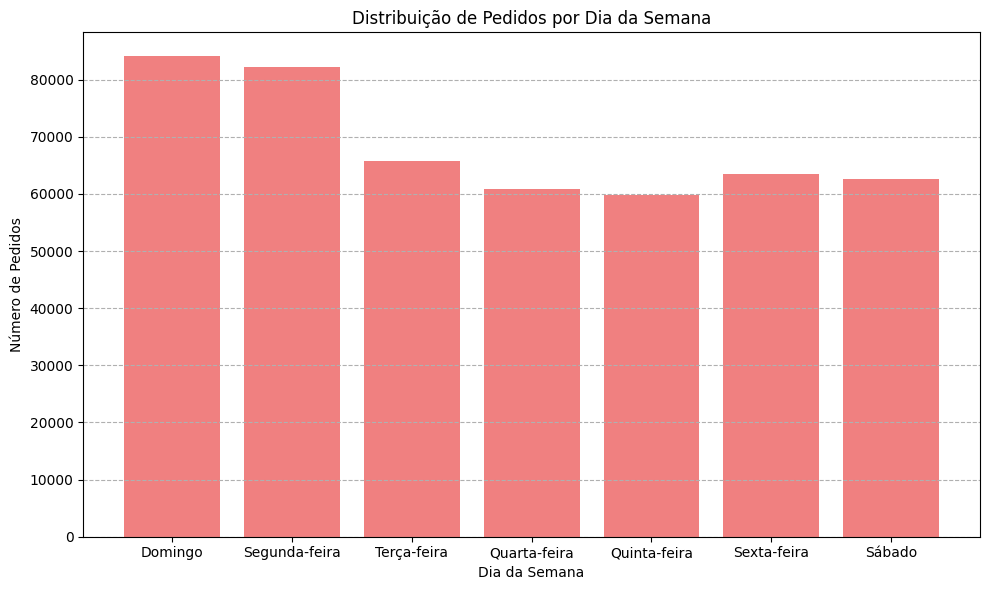

In [172]:
import matplotlib.pyplot as plt
pedidos_por_dia = df_instacart['order_dow'].value_counts().sort_index()
dias_da_semana = ['Domingo', 'Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado']

# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(dias_da_semana, pedidos_por_dia.values, color='lightcoral')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Pedidos')
plt.title('Distribuição de Pedidos por Dia da Semana')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

Escreva suas conclusões aqui
*Os dias que as pessoas com produtos alimentícios são de domingo e segunda-feira.*

### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?

Escreva suas conclusões aqui
*Os clientes esperam de 8 à 30 dias para fazerem outros pedido.*

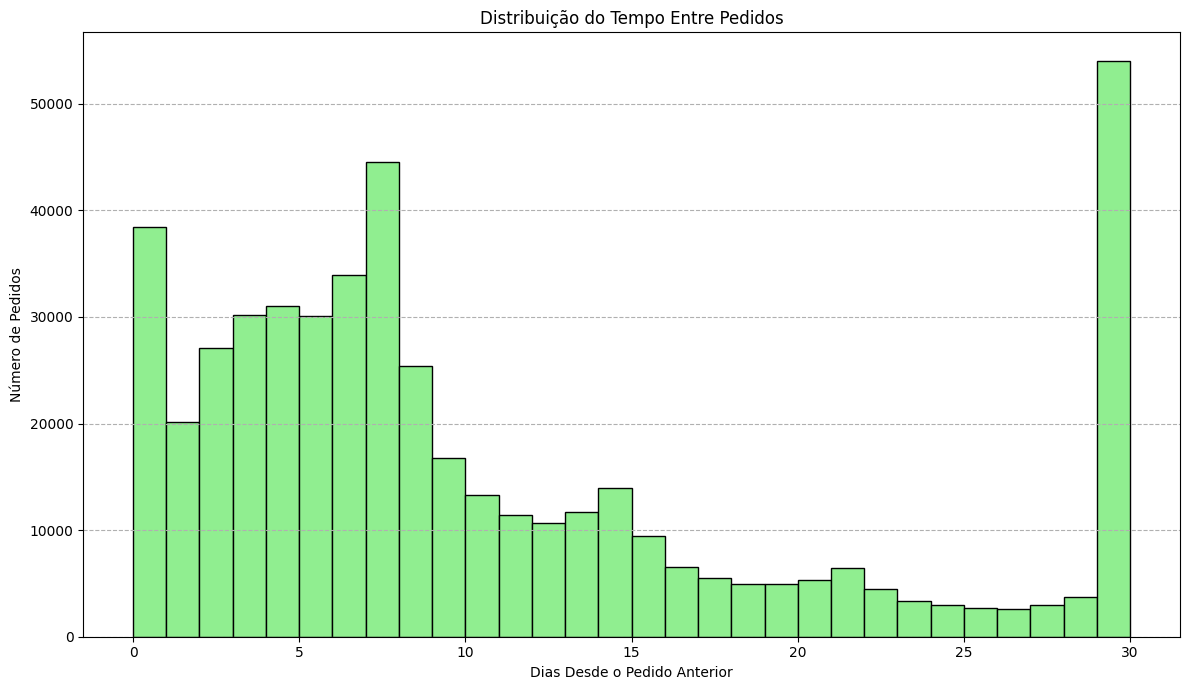

In [173]:
import matplotlib.pyplot as plt
tempo_entre_pedidos = df_instacart['days_since_prior_order'].dropna()
tempo_minimo = tempo_entre_pedidos.min()
tempo_maximo = tempo_entre_pedidos.max()
plt.figure(figsize=(12, 7))
plt.hist(tempo_entre_pedidos, bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('Dias Desde o Pedido Anterior')
plt.ylabel('Número de Pedidos')
plt.title('Distribuição do Tempo Entre Pedidos')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


# [B] Médio (é necessário concluir tudo para passar)

1.	Há alguma diferença nas distribuições de `'order_hour_of_day'` nas quartas e sábados? Construa gráficos de barras para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.
2.	Construa um gráfico de distribuição para o número de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	Quais são os 20 produtos comprados com mais frequência? Exiba os IDs e nomes.


### [B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie gráficos de barras para ambos os dias e descreva as diferenças.

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [175]:
# Filtra os dados para quartas-feiras (order_dow == 3)
pedidos_quarta = df_instacart[df_instacart['order_dow'] == 3]['order_hour_of_day'].value_counts().sort_index()

# Filtra os dados para sábados (order_dow == 6)
pedidos_sabado = df_instacart[df_instacart['order_dow'] == 6]['order_hour_of_day'].value_counts().sort_index()


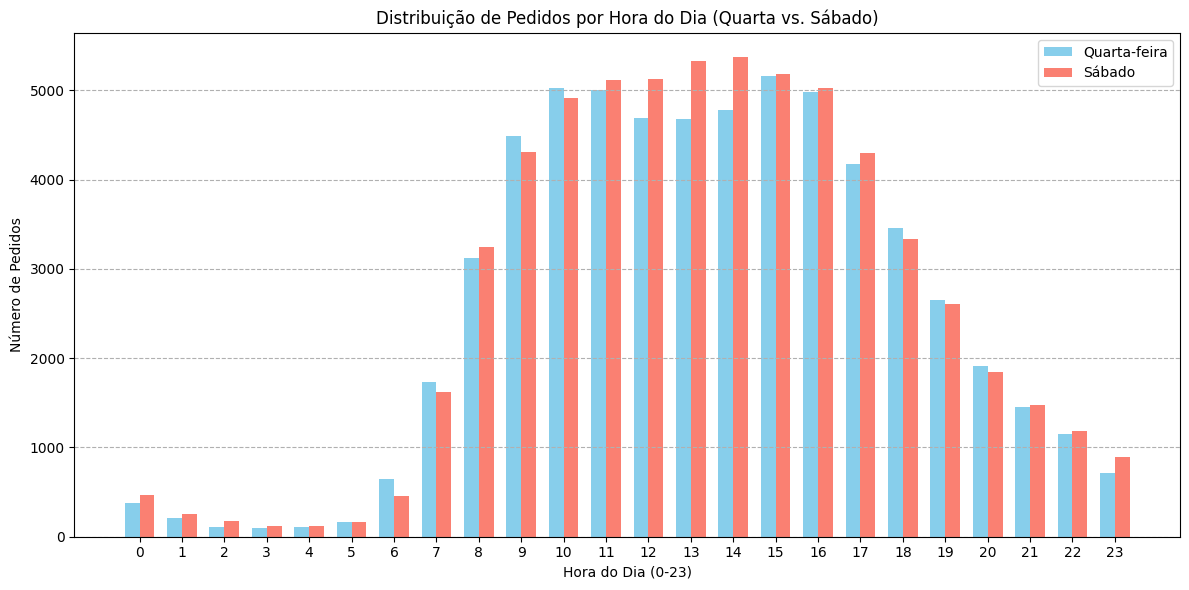

In [176]:
horas = range(24)
pedidos_quarta = pedidos_quarta.reindex(horas, fill_value=0)
pedidos_sabado = pedidos_sabado.reindex(horas, fill_value=0)
plt.figure(figsize=(12, 6))

bar_width = 0.35
index = range(len(horas))
plt.bar(index, pedidos_quarta.values, bar_width, label='Quarta-feira', color='skyblue')
plt.bar([i + bar_width for i in index], pedidos_sabado.values, bar_width, label='Sábado', color='salmon')
plt.xlabel('Hora do Dia (0-23)')
plt.ylabel('Número de Pedidos')
plt.title('Distribuição de Pedidos por Hora do Dia (Quarta vs. Sábado)')
plt.xticks([i + bar_width/2 for i in index], horas)
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

Escreva suas conclusões aqui
*Ao sábado os clientes fazem um número de pedidos maiores que outros dias, nos horários das 9hs às 17hs um pico alto de pedidos e compras de produtos. De quarta-feira também há um número grande de pedidos das 10hs as 16hs uma pequena diferença em comparação com o sábado.*

### [B2] Qual é a distribuição do número de pedidos por cliente?

In [177]:
import matplotlib.pyplot as plt
pedidos_por_cliente = df_instacart.groupby('user_id')['order_id'].nunique()
distribuicao_pedidos = pedidos_por_cliente.value_counts().sort_index()

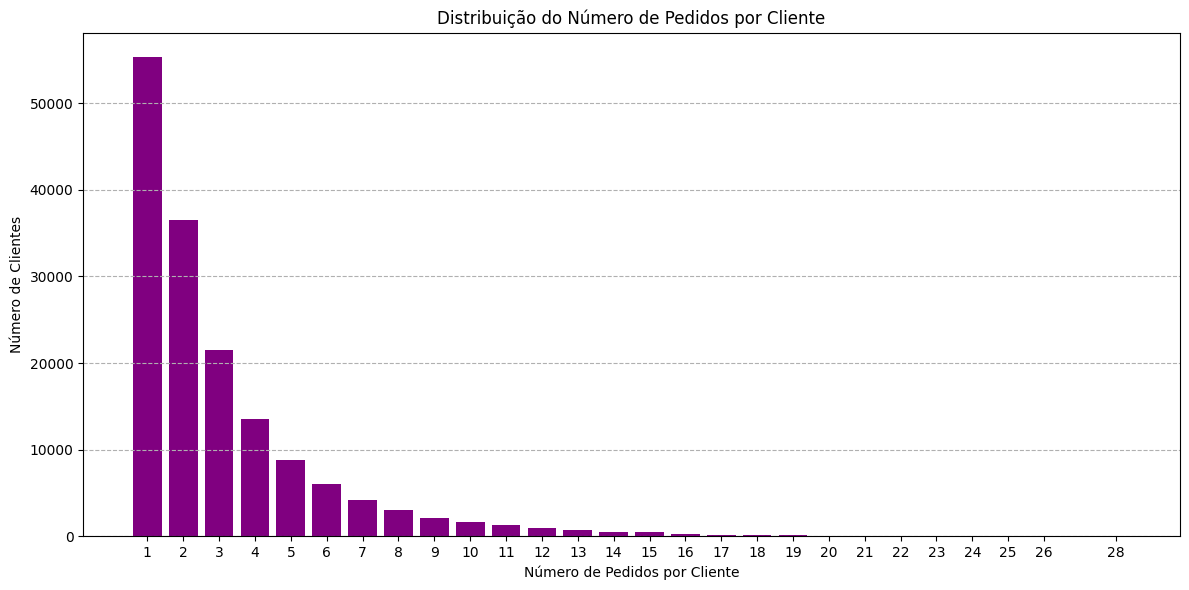

In [178]:
plt.figure(figsize=(12, 6))
plt.bar(distribuicao_pedidos.index, distribuicao_pedidos.values, color='purple')
plt.xlabel('Número de Pedidos por Cliente')
plt.ylabel('Número de Clientes')
plt.title('Distribuição do Número de Pedidos por Cliente')
plt.xticks(distribuicao_pedidos.index)  # Garante que cada número de pedidos tenha um rótulo
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

Escreva suas conclusões 
*Distribuição de ordem crescente.*

### [B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

In [179]:
most_popular_products = df_product_order['product_id'].value_counts().head(20).reset_index()
most_popular_products.columns = ['product_id', 'quantidade']
print("Os 20 produtos mais comprados (nomes):")
print(most_popular_products)

Os 20 produtos mais comprados (nomes):
    product_id  quantidade
0        24852       66050
1        13176       53297
2        21137       37039
3        21903       33971
4        47209       29773
5        47766       24689
6        47626       21495
7        16797       20018
8        26209       19690
9        27845       19600
10       27966       19197
11       22935       15898
12       24964       15292
13       45007       14584
14       39275       13879
15       49683       13675
16       28204       12544
17        5876       12232
18        8277       11993
19       40706       11781


In [180]:
top_20_produtos_com_id = pd.merge(most_popular_products, df_product[['product_name', 'product_id']], on='product_id') 
print("\nOs 20 produtos mais comprados (IDs e nomes):")
print(top_20_produtos_com_id)


Os 20 produtos mais comprados (IDs e nomes):
    product_id  quantidade              product_name
0        24852       66050                    Banana
1        13176       53297    Bag of Organic Bananas
2        21137       37039      Organic Strawberries
3        21903       33971      Organic Baby Spinach
4        47209       29773      Organic Hass Avocado
5        47766       24689           Organic Avocado
6        47626       21495               Large Lemon
7        16797       20018              Strawberries
8        26209       19690                     Limes
9        27845       19600        Organic Whole Milk
10       27966       19197       Organic Raspberries
11       22935       15898      Organic Yellow Onion
12       24964       15292            Organic Garlic
13       45007       14584          Organic Zucchini
14       39275       13879       Organic Blueberries
15       49683       13675            Cucumber Kirby
16       28204       12544        Organic Fuji Apple


Escreva suas conclusões aqui
*Verificação e mostragem dos 20 produtos mais comprados na loja pelo aplicativo de cada cliente e produto.*

# [C] Difícil (é necessário concluir pelo menos duas perguntas para passar)

1.	Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?
2.	Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.
3.	Para cada produto, qual parcela de seus pedidos são repetidos? Crie uma tabela com colunas de ID e nome do produto e a proporção de pedidos repetidos.
4.	Para cada cliente, qual proporção de todos os seus pedidos são repetidos?
5.	Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros? Exiba o ID do produto, nome e o número de vezes que ele foi o primeiro a ser adicionado a um carrinho.


### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

In [181]:
itens_por_pedido = df_product_order.groupby('order_id')['product_id'].count()

In [182]:
print(f"Número médio de itens por pedido: {itens_por_pedido.mean():.2f}")
print(f"Mediana de itens por pedido: {itens_por_pedido.median()}")
print(f"Desvio padrão de itens por pedido: {itens_por_pedido.std():.2f}")
print(f"Número mínimo de itens em um pedido: {itens_por_pedido.min()}")
print(f"Número máximo de itens em um pedido: {itens_por_pedido.max()}")

Número médio de itens por pedido: 10.10
Mediana de itens por pedido: 8.0
Desvio padrão de itens por pedido: 7.54
Número mínimo de itens em um pedido: 1
Número máximo de itens em um pedido: 127


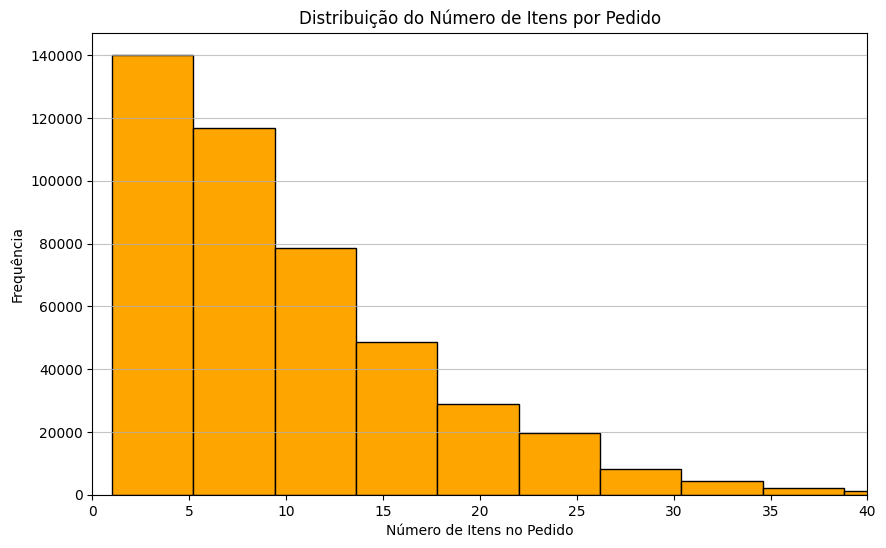


Distribuição do número de itens por pedido:
product_id
1      21847
2      26292
3      29046
4      31054
5      31923
       ...  
98         1
104        1
108        1
115        1
127        1
Name: count, Length: 90, dtype: int64


In [183]:
plt.figure(figsize=(10, 6))
plt.hist(itens_por_pedido, bins=30, edgecolor='black', color='orange')
plt.title('Distribuição do Número de Itens por Pedido')
plt.xlabel('Número de Itens no Pedido')
plt.ylabel('Frequência')
plt.xlim(0, 40)
plt.grid(axis='y', alpha=0.75)
plt.show()
distribuicao_itens_por_pedido = itens_por_pedido.value_counts().sort_index()
print("\nDistribuição do número de itens por pedido:")
print(distribuicao_itens_por_pedido)

Escreva suas conclusões aqui
*Mostragem do número de itens comprado por cada cliente normalmente de 1 à 20 produtos.*

### [C2] Quais são os 20 principais itens incluídos com mais frequência em pedidos repetidos? Exiba os IDs e nomes.

In [184]:
reordered_product = df_product_order[df_product_order['reordered'] == 1]
reordered_product.head()

,order_id,product_id,add_to_cart_order,reordered
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1
5,2456893,21616,4,1


In [185]:
df_merge = reordered_product.merge(df_product, on='product_id')
df_merge.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,567889,1560,1,1,Bag Of Ice,37,1
1,2261212,26683,1,1,Cafe Latte Pure Lightly Sweetened Iced Coffee ...,91,16
2,491251,8670,35,1,Diced Tomatoes,81,15
3,2571142,1940,5,1,Organic 2% Reduced Fat Milk,84,16
4,2456893,21616,4,1,Organic Baby Arugula,123,4


In [186]:
top_20_reordered = df_merge.groupby(['product_id', 'product_name']).size().sort_values(ascending=False).head(20)
top_20_reordered

product_id  product_name            
24852       Banana                      55763
13176       Bag of Organic Bananas      44450
21137       Organic Strawberries        28639
21903       Organic Baby Spinach        26233
47209       Organic Hass Avocado        23629
47766       Organic Avocado             18743
27845       Organic Whole Milk          16251
47626       Large Lemon                 15044
27966       Organic Raspberries         14748
16797       Strawberries                13945
26209       Limes                       13327
22935       Organic Yellow Onion        11145
24964       Organic Garlic              10411
45007       Organic Zucchini            10076
49683       Cucumber Kirby               9538
28204       Organic Fuji Apple           8989
8277        Apple Honeycrisp Organic     8836
39275       Organic Blueberries          8799
5876        Organic Lemon                8412
49235       Organic Half & Half          8389
dtype: int64

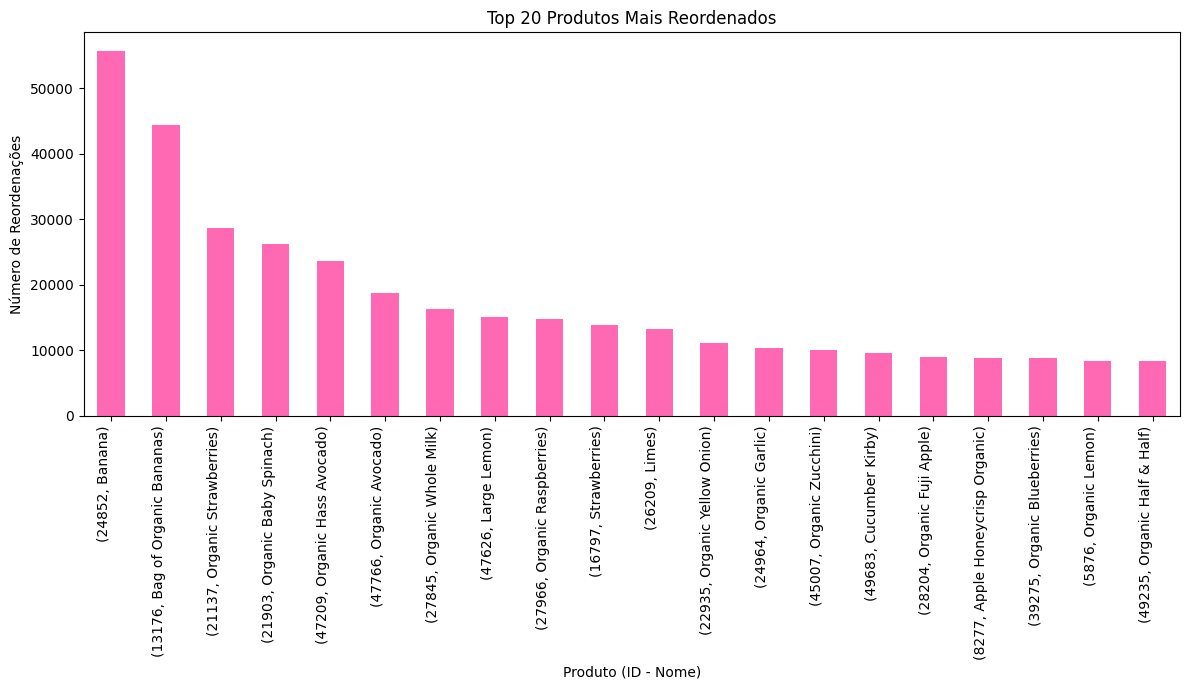

In [187]:
plt.figure(figsize=(12, 7)) 
top_20_reordered.plot(kind='bar', color='hotpink')

plt.title('Top 20 Produtos Mais Reordenados') 
plt.xlabel('Produto (ID - Nome)') 
plt.ylabel('Número de Reordenações') 
plt.xticks(rotation=90, ha='right') 
plt.tight_layout()
plt.show()

Escreva suas conclusões aqui
*Verificação dos itens incluídos com mais frequência os 20 produtos mais pedidos, com complementação de gráfico para amostragem.*

### [C3] Para cada produto, qual parcela de todos os pedidos dele são repetidos?

In [188]:
clientes_repetidos = df_instacart.groupby('user_id')['order_id'].nunique()
clientes_repetidos = clientes_repetidos[clientes_repetidos > 1].index


In [189]:
pedidos_repetidos_df = df_product_order[df_product_order['product_id'].isin(clientes_repetidos)]

In [190]:
pedidos_repetidos_produto = pedidos_repetidos_df.groupby(['product_id', 'order_id']).size().reset_index(name='pedidos_repetidos')

tabela_proporcao_repetidos = pedidos_repetidos_produto[['product_id', 'order_id']].value_counts()


print("Proporção de pedidos repetidos por produto:\n")
print(tabela_proporcao_repetidos)

Proporção de pedidos repetidos por produto:

product_id  order_id
49689       372079      1
2           228831      1
            1323576     1
49686       2034785     1
            1995739     1
                       ..
2           2594934     1
            2523756     1
            2435008     1
            1928669     1
            1466710     1
Name: count, Length: 2275443, dtype: int64


Escreva suas conclusões aqui
*Verificação da proporção do número de pedidos repetidos por produto.*

### [C4] Para cada cliente, qual proporção de todos os seus pedidos são repetidos?

In [191]:
total_orders_per_user = df_instacart.groupby('user_id')['order_id'].nunique()
repeated_orders_df = df_instacart[df_instacart['user_id'].isin(clientes_repetidos)]
num_repeated_orders_per_user = repeated_orders_df.groupby('user_id')['order_id'].nunique()


In [192]:
proportion_repeated_orders = num_repeated_orders_per_user / total_orders_per_user

print("Proporção de pedidos repetidos por cliente:\n")
print(proportion_repeated_orders.sort_values(ascending=False))

Proporção de pedidos repetidos por cliente:

user_id
206182    1.0
206180    1.0
206178    1.0
206177    1.0
206174    1.0
         ... 
206190    NaN
206191    NaN
206194    NaN
206196    NaN
206203    NaN
Name: order_id, Length: 157437, dtype: float64


Escreva suas conclusões aqui
*Verificação do número de pedidos repetidos por cliente de 1 pra 1 uma proporção.*

### [C5] Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros?

In [195]:
 
first_added_items = df_product_order[df_product_order['add_to_cart_order'] == 1]


top_first_added = first_added_items['product_id'].value_counts().nlargest(20)


top_first_added_names = pd.merge(top_first_added.reset_index(), df_product, on='product_id')


print("Os 20 principais itens adicionados ao carrinho primeiro:\n")
print(top_first_added_names)

Os 20 principais itens adicionados ao carrinho primeiro:

    product_id  count                 product_name  aisle_id  department_id
0        24852  15562                       Banana        24              4
1        13176  11026       Bag of Organic Bananas        24              4
2        27845   4363           Organic Whole Milk        84             16
3        21137   3946         Organic Strawberries        24              4
4        47209   3390         Organic Hass Avocado        24              4
5        21903   3336         Organic Baby Spinach       123              4
6        47766   3044              Organic Avocado        24              4
7        19660   2336                 Spring Water       115              7
8        16797   2308                 Strawberries        24              4
9        27966   2024          Organic Raspberries       123              4
10       44632   1914   Sparkling Water Grapefruit       115              7
11       49235   1797         

Escreva suas conclusões aqui
*Verificação e mostragem dos produtos que os clientes tem o hábito de colocarem no carrinho antes de qualquer outro produto. São: leite, limão, banana, frutas e verduras. Itens essenciais para o dia a dia.*

# Conclusão geral do projeto:

*A plataforma Instacart é um excelente aplicativo de supermercado para entregas. Após algumas verificações encontramos algumas falhas pequenas, que pudemos corrigir e limpar para fornecer um melhor relatório de dados para o cliente.
Contendo muitas perguntas redundantes, algumas perguntas desnecessárias. Detalhação para gerar um projeto completo e eficiente.*